# Вітаю на фінальному проєкті!
Протягом курсу ми навчились завантажувати дані в Python, трансформувати їх, чистити, агрегувати, знаходити з допомогою даних відповіді на наші питання. 
Задача фінального проєкту - продемонструвати той рівень роботи з даними, на якому ви є зараз. 

Цей ноутбук буде присвячений аналізу даних з файла `Grocery DataBase.xlsx`, який є в папці `Дані` на Диску. Так, це Excel файл, але ми можемо дуже просто завантажувати дані з нього у Python. Покажу пару команд для роботи з Excel файлом.

Для початку встановимо бібліотеку, яка потрібна для роботи з Excel файлами з pandas. Можна встановити тут, або в терміналі, але якщо Ви встановлюєте в терміналі, то після того треба перезапустити ядро (Kernel) ноутбуку, аби бібліотека точно підтягнулась. Іноді підтягується і без того, але це на випадок, що робити, якщо компілятор каже, що її не бачить.

In [1]:
!pip install openpyxl

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

Ось так можемо переглянути, які є листки в Excel файлі:

In [2]:
# замініть на шлях до файлу на своєму комп`ютері
path_to_file = 'C:/Users/olran/OneDrive/Робочий стіл/Grocery Database.xlsx'

In [4]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

А так можемо зчитати конкретний листок:

In [5]:
xl.parse('Grosto DB')

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.10,13.324080,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.10,25.264800,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50442,GSW01533,2019-12-28,2019,12,20:59:27.302000,9893317658,MIDSG0630,21,28,Female,...,0.07,79.358048,Card,Philippine National bank,0.141,0.15,0.709,0.87420,0.9300,4.39580
50443,GSW01534,2019-12-29,2019,12,13:14:45.030000,9809301701,MIDSG0293,41,28,Female,...,0.07,11.292352,Wallet,Philippine National bank,0.068,0.15,0.782,0.73984,1.6320,8.50816
50444,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.109,0.15,0.741,0.43273,0.5955,2.94177
50445,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.148,0.15,0.702,0.60680,0.6150,2.87820


Читати дані можна і з Pandas, але тут немає можливості переглянути наявні листки, а також довше відбувається читання даних.

In [3]:
df = pd.read_excel(path_to_file)
df

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.10,13.324080,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.10,25.264800,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50442,GSW01533,2019-12-28,2019,12,20:59:27.302000,9893317658,MIDSG0630,21,28,Female,...,0.07,79.358048,Card,Philippine National bank,0.141,0.15,0.709,0.87420,0.9300,4.39580
50443,GSW01534,2019-12-29,2019,12,13:14:45.030000,9809301701,MIDSG0293,41,28,Female,...,0.07,11.292352,Wallet,Philippine National bank,0.068,0.15,0.782,0.73984,1.6320,8.50816
50444,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.109,0.15,0.741,0.43273,0.5955,2.94177
50445,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.148,0.15,0.702,0.60680,0.6150,2.87820


В файлі ви знайдете самі дані та опис колонок.   

**Задача**: Уявіть, що Вам дали цей набір даних з питанням "Що корисного ми можемо з них взяти для розвитку нашого бізнесу?". То Вам необхідно розказати бізнесу історію про ці дані у форматі
1. питання, яке Вас як робітника цього бізнесу, який дуже вболіває за його успіх, цікавить щодо цих даних
2. код для відповіді на це питання
3. висновки, які я можу зробити з огляду на результат виконання коду: які рішення ми можемо прийняти щодо подальших кроків в аналізі або які рекомендації Ви б дали бізнесу виходячи з результатів.

**Необхідно** поставити до даних _мінімум_ 10 бізнес-питань, при цьому зробивши   
- початковий аналіз даних: їх розмір, структура, наявність пропущених значень та що з ними зробити, зміна типів даних там, де це доречно зробити (наприклад, якщо колонка завантажилась як тип string, а з опису видно, що там має бути float) - ця частина не входить у бізнес-питання, але є необхідною при аналізі даних.  
- _мінімум_ 1 зведену таблицю або її аналог
- _мінімум_ 5 візуалізацій, 3 з яких мають різний тип (наприклад, scatter plot, line plot, pair plot)

В даному мінімум-наборі немає вимоги на використання SQL та тестування статистичних гіпотез. Але якщо Вам хочеться потренуватись, то Ви можете це зробити скориставшись pandasql, а також перевірити, чи є відмінність між двома групами у якомусь показнику з допомогою тестування статистичних гіпотез. Останнє найбільш доречно, якщо, наприклад, ми беремо чоловіків і жінок, бачимо що у них доволі схожі середні чеки, але наче відрізняються. Аби зрозуміти, чи різниця статистично значущою, можна це перевірити з допомогою тестування стат. гіпотез.

Питанням може бути як "Яка є кількість унікальних чеків в цьому наборі даних?" так і щось значно складніше. Якщо у Вас складне питання, і аби відповісти на нього Ви мали відповісти на 3 менших питання (зробити якісь трансформації над даними, подивитись щось), то це рахується як 3 питання з 10 необхідних у завданні. Звісно ж Ви можете зробити більше за встановлений мінімум - все буде перевірено :)

Тут є великий простір для Вашої фантазії. **Тому рекомендація:** виділіть на це завданні певну кількість годин (наприклад, середнє значення по тому, скільки у Вас займало виконання домашніх завдань в курсі, але я рекомендую не менше 2х годин роботи)
і поставте собі за ціль всю роботу вмістити в цю кількість годин.
Це дозволить Вам управляти своїм часом, пріоритизувати питання, які ставите до даних. І так часто є в роботі: коли ми не знаємо, що ми шукаємо, ми ставимо обмеження по часу (задача типу spike) і робимо все, що встигнемо, за цей час.

По закінченню - завантажуємо ноутбук на git і додаємо посилання в здачу роботи в Eduflow. 
До речі, з часом, вам може захотітись доповнити цей ноутбук, коли арсенал ваших навичок по роботі з даними розшириться. І це буде чудова ідея!

**Успіхів!**

In [4]:
display( df.dtypes, df.shape)

Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

(50447, 32)

In [5]:
df.isna().sum()

Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64

In [6]:
df

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.10,13.324080,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.10,25.264800,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50442,GSW01533,2019-12-28,2019,12,20:59:27.302000,9893317658,MIDSG0630,21,28,Female,...,0.07,79.358048,Card,Philippine National bank,0.141,0.15,0.709,0.87420,0.9300,4.39580
50443,GSW01534,2019-12-29,2019,12,13:14:45.030000,9809301701,MIDSG0293,41,28,Female,...,0.07,11.292352,Wallet,Philippine National bank,0.068,0.15,0.782,0.73984,1.6320,8.50816
50444,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.109,0.15,0.741,0.43273,0.5955,2.94177
50445,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.148,0.15,0.702,0.60680,0.6150,2.87820


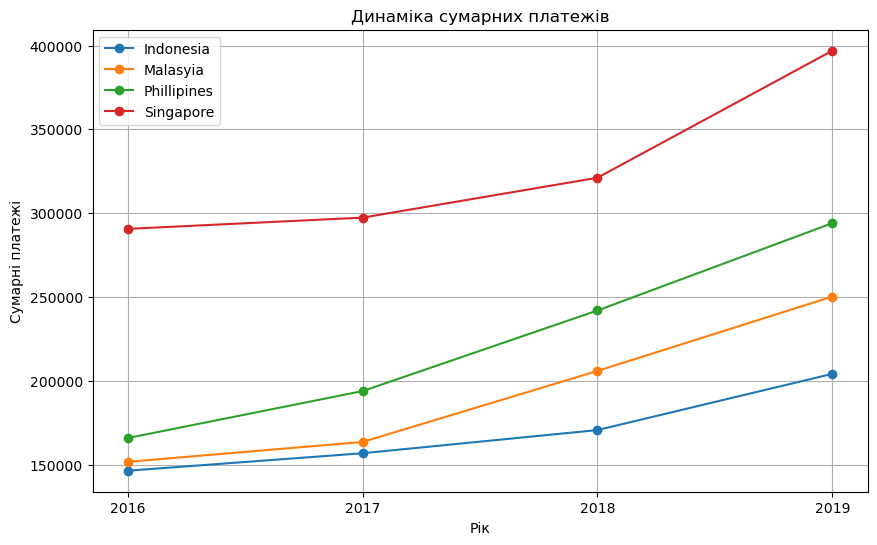

In [26]:
# 1 Динаміка сумарних платежів по країнам 
pay_pivot = df.pivot_table(index='Year', columns='Country', values='Gross Bill Amount', aggfunc='sum')
plt.figure(figsize=(10, 6))
lines = plt.plot(pay_pivot.index, pay_pivot.values, marker='o')
plt.title('Динаміка сумарних платежів')
plt.xlabel('Рік')
plt.ylabel('Сумарні платежі')
lines[0].set_label('Indonesia')
lines[1].set_label('Malasyia')
lines[2].set_label('Phillipines')
lines[3].set_label('Singapore')
plt.xticks(pay_pivot.index.unique())
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Це допоможе зрозуміти чи розвивається бізнес

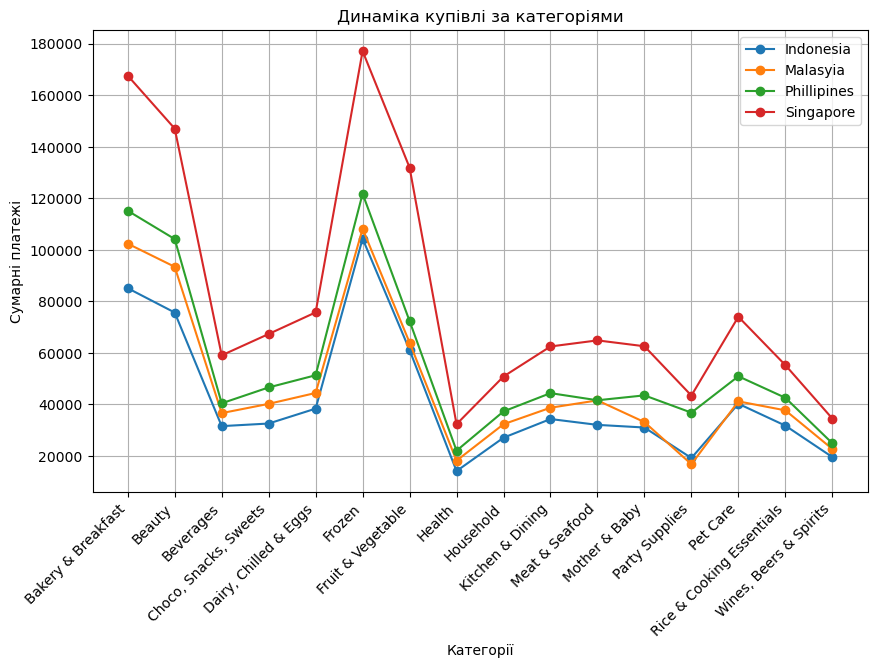

In [27]:
# 2 Яка категорія найпопулярніша в кожній з країн?
catgory_pivot = df.pivot_table(index='Category', columns='Country', values='Gross Bill Amount', aggfunc='sum')
plt.figure(figsize=(10, 6))
lines = plt.plot(catgory_pivot.index, catgory_pivot.values, marker='o')
plt.title('Динаміка купівлі за категоріями')
plt.xlabel('Категорії')
plt.ylabel('Сумарні платежі')
lines[0].set_label('Indonesia')
lines[1].set_label('Malasyia')
lines[2].set_label('Phillipines')
lines[3].set_label('Singapore')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right');

In [ ]:
Це дасть нагоду зрозуміти що і де купують найчастіше

In [28]:
# 3 Хто робить більше покупок в кожній з категорій
category_counts = df.groupby('Gender')['Category'].value_counts()
category_counts

Gender  Category                 
Female  Bakery & Breakfast           5596
        Frozen                       5401
        Beauty                       4309
        Fruit & Vegetable            3638
        Pet Care                     2850
        Dairy, Chilled & Eggs        2808
        Choco, Snacks, Sweets        2472
        Kitchen & Dining             2099
        Rice & Cooking Essentials    1966
        Beverages                    1813
        Meat & Seafood               1797
        Mother & Baby                1727
        Party Supplies               1541
        Household                    1536
        Wines, Beers & Spirits       1422
        Health                        847
Male    Bakery & Breakfast           1174
        Frozen                        992
        Beauty                        896
        Fruit & Vegetable             732
        Pet Care                      615
        Dairy, Chilled & Eggs         573
        Choco, Snacks, Sweets         547


In [ ]:
Тут є нагода дізнатись що найчастіше купують, тобто які товари потрібно привозити частіше, Стать важливо для розстановки товарів та дизайну 

,Country,Payment Mode
0,Indonesia,Cash
1,Malaysia,Card
2,Philippines,Cash
3,Singapore,Card


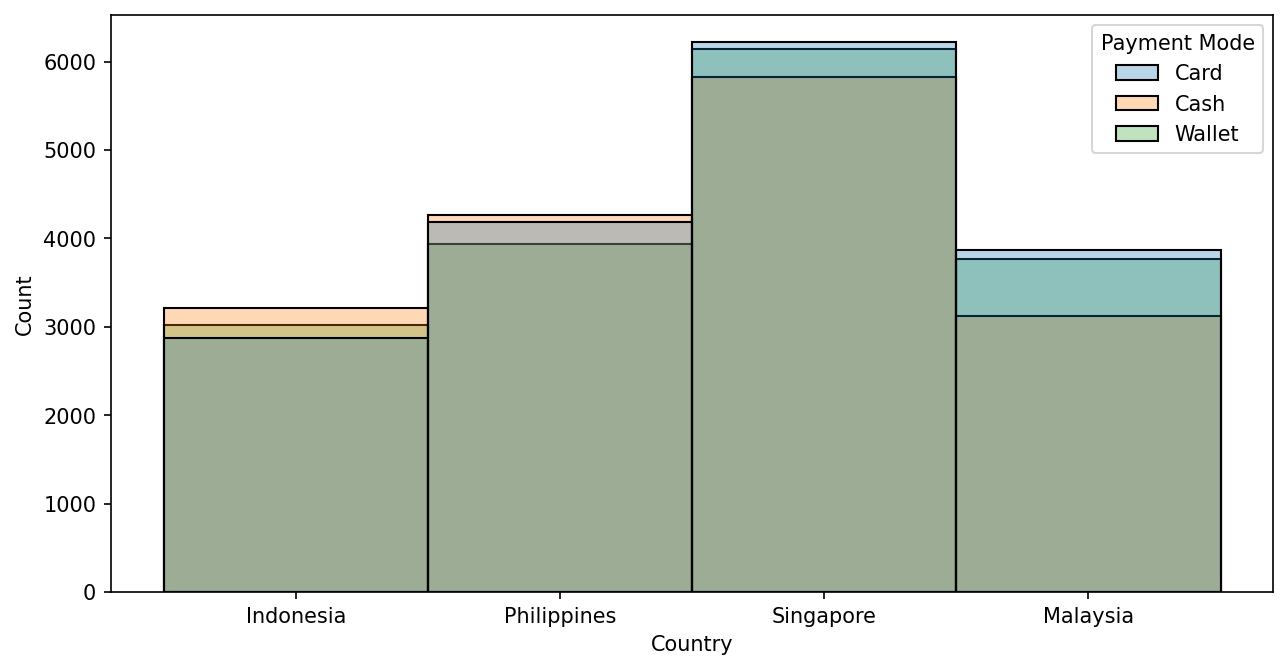

In [31]:
# 4 Найпопулярніши спосіб оплати в кожній з країн payment
payment = df.groupby('Country')['Payment Mode'].agg(lambda x: x.value_counts().index[0]).reset_index()
plt.figure(figsize=(10,5), dpi=150)
sns.histplot(x='Country', hue='Payment Mode', data=df.sort_values('Payment Mode'), alpha=.3);
payment

In [ ]:
Тут видно вид оплати для кожної країни, це треба дізнатись для того щоб забезпечити термінали та потрібну к-ть готівки для розміну

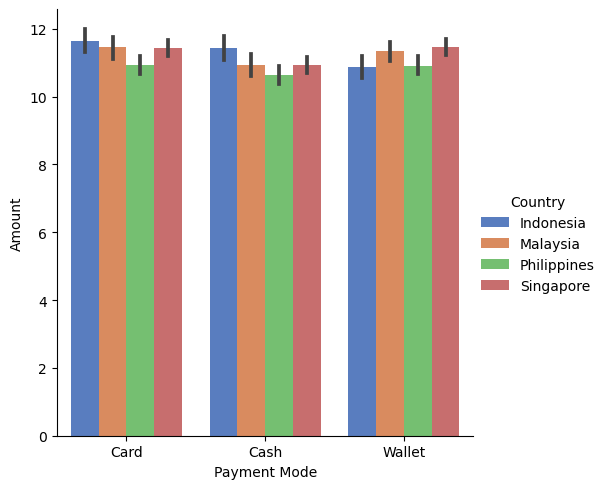

In [32]:
# 5 Залежність способу оплати від суми покупки
sns.catplot(data=df, x='Payment Mode', y='Amount', hue='Country', palette="muted", kind='bar');

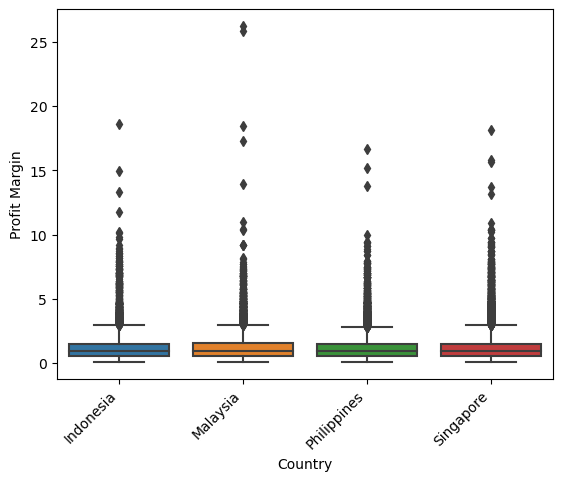

In [33]:
# 6 Яка країна приносить найбільшу маржу прибутку
sns.boxplot(y='Profit Margin', x='Country', data=df)
plt.xticks(rotation=45, ha='right');

In [ ]:
На цьому графіку видно що найбільшу маржу приносить Малайзія, так як найбільший викид в неї, 
цікаво перевірити, чому

In [34]:
# 7 Перевірка на податки
df.groupby('Country').GST.mean()

Country
Indonesia      0.10
Malaysia       0.06
Philippines    0.12
Singapore      0.07
Name: GST, dtype: float64

Тут впринципі це і підтверджується

In [35]:
# 8 В які дні здійснюються найбільше покупок у всіх країнах разом?
df['Date'] = pd.to_datetime(df['Date'])

# # Забираємо рік та залишаємо лише день і місяць
df['Date'] = df['Date'].dt.strftime('%d-%m')

group_by_date = df.groupby('Date')['Country'].sum()
# К-ть записів для кожної дати за всі роки
total = df.groupby('Date')['Country'].size()

max_value = total.sort_values(ascending=False).head(5)
min_value = total.sort_values(ascending=False).tail(5)
display(max_value, df['Country'].max(), min_value, df['Country'].min())

Date
18-05    214
18-11    211
19-03    209
26-02    206
22-01    204
Name: Country, dtype: int64

'Singapore'

Date
07-10    72
22-04    70
23-11    62
05-01    57
29-02    13
Name: Country, dtype: int64

'Indonesia'

Це дослідження допоможе з*ясувати де і коли потрібно найбільше персоналу та товарів

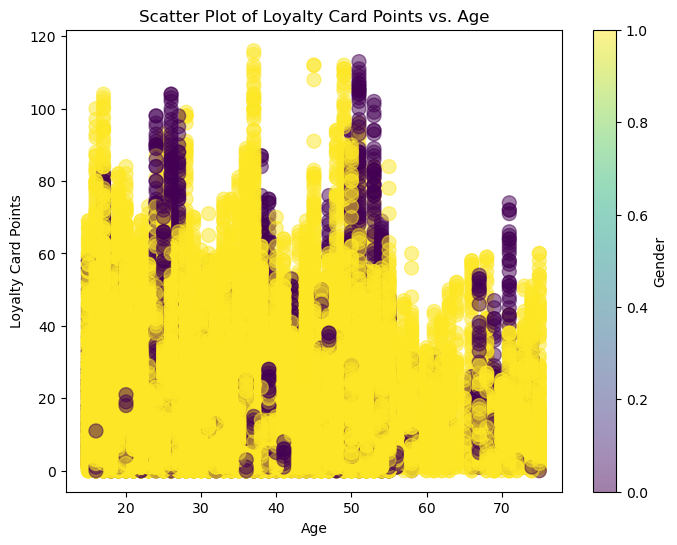

In [36]:
# 9 Залежність між віком статтю та к-тю балів лояльності 

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

col_x = 'Age'
col_y = 'Loyalty Card Points'
color_feature = 'Gender'

plt.figure(figsize=(8, 6))

plt.scatter(df[col_x], df[col_y], s=100, alpha=0.5, c=df[color_feature])

plt.xlabel(col_x)
plt.ylabel(col_y)

plt.colorbar(label=color_feature)
plt.title('Scatter Plot of Loyalty Card Points vs. Age')

plt.show()

З допомогою цього графіку видно, люди якого віку і статі користуються балами лояльності, це дає розуміння які товари і кому можна проопонувати

In [37]:
# Перетворення стовпця 'Time' у формат datetime
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S.%f', errors='coerce')

# Витягаємо години зі стовпця 'Time' та створюємо новий стовпець 'Hour'
df['Hour'] = df['Time'].dt.hour

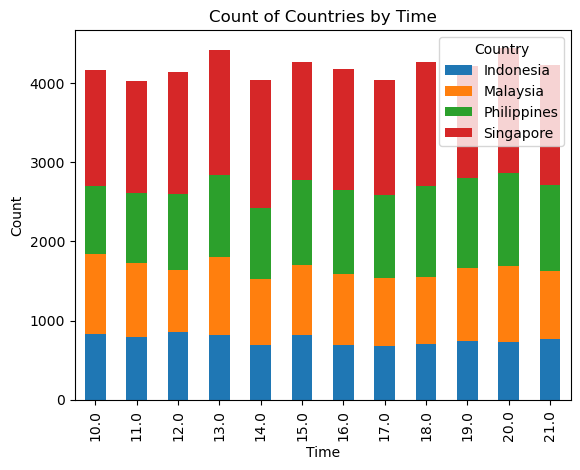

In [39]:
# 10 В який час доби здійснються набільше покупок
grouped = df.groupby('Hour')['Country'].value_counts().unstack(fill_value=0)

# Побудова стовпчастої діаграми
grouped.plot(kind='bar', stacked=True)

# Додавання підписів і заголовка
plt.xlabel('Time')
# plt.xticks(grouped.index.nunique())
plt.ylabel('Count')
plt.title('Count of Countries by Time')

# Показати графік
plt.show()

Таким чином видно де і коли найбільша кількість покупок, це потрібно для того щоб в час-пік була потрібна кількість персоналу, щоб якість і швидкість обслуговування була найкращою